## 2. CUR decomposition

In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt

In [2]:
def CUR_decomp(X, s, r):
    # Solve CUR decomposition
    
    # First compute probability
    X_square = X**2
    prob_col = np.sum(X_square,axis=0)
    prob_row = np.sum(X_square,axis=1)
    prob_col = prob_col/ np.sum(prob_col)
    prob_row = prob_row/ np.sum(prob_row)
    prob_col_cumsum = np.cumsum(prob_col)
    prob_row_cumsum = np.cumsum(prob_row)
    
    # Second sample R and C
    id_col = np.zeros(s, np.int)
    id_row = np.zeros(r, np.int)
    
    for i in range(s):
        p = rn.rand()
        id_col[i] = np.where(prob_col_cumsum>=p)[0][0]
    id_col = np.sort(id_col)
    C = X[:,id_col]/np.sqrt(s * prob_col[None,id_col])
    
    for i in range(r):
        p = rn.rand()
        id_row[i] = np.where(prob_row_cumsum>=p)[0][0]
    id_row = np.sort(id_row)
    R = X[id_row,:]/np.sqrt(r * prob_row[id_row,None])
    
    # Solve U
    U = la.pinv(C) @ X @ la.pinv(R)
    return C, U, R

def CUR_decomp_primitive(X, s, r):
    # Solve CUR decomposition
    
    # First compute probability
    X_square = X**2
    prob_col = np.sum(X_square,axis=0)
    prob_row = np.sum(X_square,axis=1)
    prob_col = prob_col/ np.sum(prob_col)
    prob_row = prob_row/ np.sum(prob_row)
    prob_col_cumsum = np.cumsum(prob_col)
    prob_row_cumsum = np.cumsum(prob_row)
    
    # Second sample R and C
    id_col = np.zeros(s, np.int)
    id_row = np.zeros(r, np.int)
    
    for i in range(s):
        p = rn.rand()
        id_col[i] = np.where(prob_col_cumsum>=p)[0][0]
    id_col = np.sort(id_col)
    C = X[:,id_col]/np.sqrt(s * prob_col[None,id_col])
    
    for i in range(r):
        p = rn.rand()
        id_row[i] = np.where(prob_row_cumsum>=p)[0][0]
    id_row = np.sort(id_row)
    R = X[id_row,:]/np.sqrt(r * prob_row[id_row,None])
    Psi = R[:,id_col].T/np.sqrt(s * prob_row[id_col,None])
    k = min(np.linalg.matrix_rank(R @ R.T,tol=1e-3),r)
    u, s, vt = np.linalg.svd(R @ R.T)
    sinv = np.zeros(s.shape)
    idx = np.argsort(s)[::-1]
    for i in range(k):
        if s[idx[i]]<1e-3:
            sinv[idx[i]]=0
        else:
            sinv[idx[i]]=1.0/s[idx[i]]
    RRTinv = u @ np.diag(sinv) @ vt
    U = Psi @ RRTinv
    return C, U, R

def CUR_decomp_primitive_column(X, s, r):
    # Solve CUR decomposition
    
    # First compute probability
    X_square = X**2
    prob_col = np.sum(X_square,axis=0)
    prob_row = np.sum(X_square,axis=1)
    prob_col = prob_col/ np.sum(prob_col)
    prob_row = prob_row/ np.sum(prob_row)
    prob_col_cumsum = np.cumsum(prob_col)
    prob_row_cumsum = np.cumsum(prob_row)
    
    # Second sample R and C
    id_col = np.zeros(s, np.int)
    id_row = np.zeros(r, np.int)
    
    for i in range(s):
        p = rn.rand()
        id_col[i] = np.where(prob_col_cumsum>=p)[0][0]
    id_col = np.sort(id_col)
    C = X[:,id_col]/np.sqrt(s * prob_col[None,id_col])
    
    for i in range(r):
        p = rn.rand()
        id_row[i] = np.where(prob_row_cumsum>=p)[0][0]
    id_row = np.sort(id_row)
    R = X[id_row,:]/np.sqrt(r * prob_row[id_row,None])
    Psi =C[id_row,:].T/np.sqrt(r * prob_row[None, id_row])
    k = min(np.linalg.matrix_rank(C.T @ C,tol=1e-3),r)
    u, s, vt =  np.linalg.svd(C.T @ C)
    sinv =np.zeros(s.shape)
    idx = np.argsort(s)[::-1]
    for i in range(k):
        if s[idx[i]]<1e-3:
            sinv[idx[i]]=0
        else:
            sinv[idx[i]]=1.0/s[idx[i]]
    CTCinv = u @ np.diag(sinv) @ vt

    U = CTCinv @ Psi
    return C, U, R

SyntaxError: invalid syntax (<ipython-input-2-00f4b611cb38>, line 30)

For analysis of error, you can estimate $\frac{\|A-CUR\|}{\|A\|}$ and try to let the error be less than $10\%$. Below are one specific example. Based on choice of $U$, there will be three possibilities.

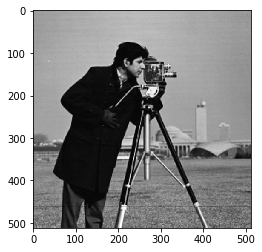

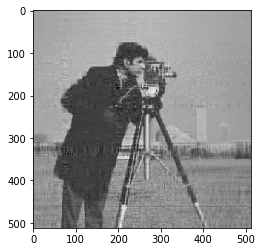

L2_norm error 3.464203501584575%
Nuclear_norm error 31.024046948669255%
Frobenius_norm error 9.836781006974787%


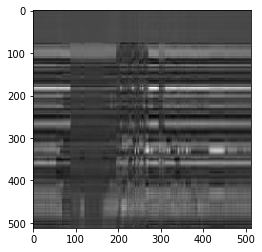

L2_norm error 116.57535047979923%
Nuclear_norm error 109.8133152495779%
Frobenius_norm error 116.85310101723687%


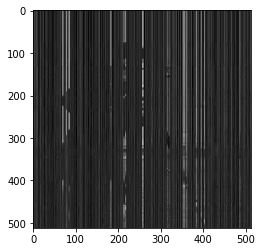

L2_norm error 338.83361281386647%
Nuclear_norm error 260.47466048423115%
Frobenius_norm error 339.592668488943%


In [10]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
img = plt.imread("test_image.png")
gray_img = rgb2gray(img)   
plt.clf
plt.imshow(gray_img,cmap='gray')
plt.show()


C, U, R = CUR_decomp(gray_img, 100, 100)
plt.clf()
plt.imshow(C @ U @ R, cmap='gray')
plt.show()

print("L2_norm error {}%".format(la.norm(gray_img -( C @ U @ R),2)/la.norm(gray_img,2)*100))
print("Nuclear_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'nuc')/la.norm(gray_img,'nuc')*100))
print("Frobenius_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'fro')/la.norm(gray_img,'fro')*100))


C, U, R = CUR_decomp_primitive_column(gray_img, 200, 20)
plt.clf()
plt.imshow(C @ U @ R, cmap='gray')
plt.show()


print("L2_norm error {}%".format(la.norm(gray_img -( C @ U @ R),2)/la.norm(gray_img,2)*100))
print("Nuclear_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'nuc')/la.norm(gray_img,'nuc')*100))
print("Frobenius_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'fro')/la.norm(gray_img,'fro')*100))


C, U, R = CUR_decomp_primitive(gray_img, 20, 200)
plt.clf()
plt.imshow(C @ U @ R, cmap='gray')
plt.show()


print("L2_norm error {}%".format(la.norm(gray_img -( C @ U @ R),2)/la.norm(gray_img,2)*100))
print("Nuclear_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'nuc')/la.norm(gray_img,'nuc')*100))
print("Frobenius_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'fro')/la.norm(gray_img,'fro')*100))


For block CUR decomposition. You can try either sample in group or sample in each block. Here is one example of sample in block

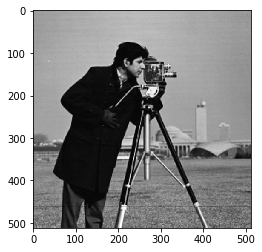

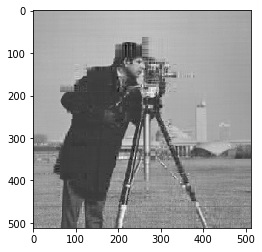

L2_norm error 3.472317644557225%
Nuclear_norm error 33.46719632961552%
Frobenius_norm error 9.947348357566229%


In [16]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
img = plt.imread("test_image.png")
gray_img = rgb2gray(img)   
plt.clf
plt.imshow(gray_img,cmap='gray')
plt.show()

block_img = np.zeros(gray_img.shape)

# 8 by 8 blocks with each block 64*64
for i in range(8):
    for j in range(8):
        part = gray_img[i*64:(i+1)*64,j*64:(j+1)*64]
        C, U, R = CUR_decomp(part, 12, 12)
        block_img[i*64:(i+1)*64,j*64:(j+1)*64] = C@U@R
        
plt.clf()
plt.imshow(block_img, cmap='gray')
plt.show()


print("L2_norm error {}%".format(la.norm(gray_img -( block_img),2)/la.norm(gray_img,2)*100))
print("Nuclear_norm error {}%".format(la.norm(gray_img - (block_img),'nuc')/la.norm(gray_img,'nuc')*100))
print("Frobenius_norm error {}%".format(la.norm(gray_img - (block_img),'fro')/la.norm(gray_img,'fro')*100))


